# 4.  Análisis por objetivos (Objetivo Específico 1)

Análisis Temporal (Objetivo Específico 1): Describir la evolución temporal de la cobertura, deserción, aprobación y repitencia en la educación preescolar, básica y media en los municipios de Colombia entre 2011 y 2023.

## 4.1 Configuración del Entorno e Importación de Módulos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
  
sys.path.append(os.path.abspath(os.path.join('..', 'src'))),
sys.path.append(os.path.abspath(os.path.join('..', 'config'))),
   
# Importar funciones y variables desde tus módulos,
from data_loader import load_processed_data ,
# Importar funciones de visualización,
from visualizer import(
    plotly_time_series,
    plotly_subcategories_time_series,
    heatmap_sub_time_series,
    plot_yearly_boxplots,
    plot_heatmap_correlation,
    plot_distribution_comparison_two_years
) 
from utils import (
    temporal_statistics
)
from settings import (
    PROCESSED_DATA_PATH, 
    INDICADORES_ESTADISTICO, 
    FIGURES_PATH,
    INDICADORES_PLOTLY, 
    SUBCATEGORIAS_PLOTLY,
    INDICADORES_BOXPLOTS,
    TITULOS_BOXPLOTS 
)

## 4.2 Carga del Dataset Limpio

In [ ]:
# Cargar el dataset limpio 
df_cleaned = load_processed_data(PROCESSED_DATA_PATH)

if df_cleaned is not None:
    print("✅ Datos limpios cargados exitosamente.\n")
    print(df_cleaned.head())
    print(f"Dimensiones del DataFrame limpio: {df_cleaned.shape}")
else:
    print("⛔ No se pudo cargar el DataFrame limpio.")

Intentando cargar los datos procesados desde: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\data\processed\datos_educacion_limpios.csv
Datos procesados cargados exitosamente. Dimensiones: (14582, 34)
✅ Datos limpios cargados exitosamente.

   Unnamed: 0  anio  codigo_municipio   municipio  codigo_departamento  \
0           0  2023              5001    Medellín                    5   
1           1  2023              5002   Abejorral                    5   
2           2  2023              5004    Abriaquí                    5   
3           3  2023              5021  Alejandría                    5   
4           4  2023              5030       Amagá                    5   

  departamento  codigo_etc              etc  poblacion_5_16  \
0    Antioquia      3759.0         Medellín        377562.0   
1    Antioquia      3758.0  Antioquia (ETC)          3634.0   
2    Antioquia      3758.0  Antioquia (ETC)           503.0   
3    Antioquia      3758.0  Antioquia (E

### 4.3 Estadísticas básicas anuales

In [3]:
estadisticas_anuales = temporal_statistics(
    df_cleaned,
    INDICADORES_ESTADISTICO,
    grupo_temporal='anio' 
)

# Mostrar resultados
estadisticas_anuales.head(13)

✅ Estadísticas calculadas para 20/20 indicadores


,anio,cobertura_neta_mean,cobertura_neta_median,cobertura_neta_std,cobertura_neta_primaria_mean,cobertura_neta_primaria_median,cobertura_neta_primaria_std,cobertura_neta_secundaria_mean,cobertura_neta_secundaria_median,cobertura_neta_secundaria_std,...,reprobacion_std,reprobacion_primaria_mean,reprobacion_primaria_median,reprobacion_primaria_std,reprobacion_secundaria_mean,reprobacion_secundaria_median,reprobacion_secundaria_std,reprobacion_media_mean,reprobacion_media_median,reprobacion_media_std
0,2011,87.000624,87.450,16.849926,86.970178,87.900,17.557144,65.296533,67.100,18.451098,...,2.953942,3.460303,4.43,2.303508,6.331453,7.98,3.817827,3.799153,4.17,2.790765
1,2012,85.585116,86.400,17.025903,85.079234,86.250,17.810067,65.625749,67.150,18.928320,...,3.155310,4.082914,4.43,2.643825,6.779349,7.98,4.140143,4.233601,4.24,3.017358
2,2013,85.386453,86.200,17.395132,83.932050,84.450,17.871325,67.507736,68.900,18.909304,...,2.928815,4.462790,4.43,2.548630,7.415998,7.98,3.912861,4.434242,4.24,2.850434
3,2014,86.777522,87.425,4.929047,77.387745,78.480,8.449199,68.365954,69.735,9.088606,...,2.745869,3.775321,4.43,2.013622,7.019465,7.98,3.326681,3.573280,4.24,2.304937
4,2015,83.419492,84.050,18.123789,81.019519,82.225,18.494704,67.478004,68.810,19.160355,...,3.156340,4.574750,4.43,2.643395,7.891907,7.98,4.271197,4.374314,4.24,2.898068
5,2016,83.543182,82.750,22.651055,81.217112,80.460,22.778936,68.637772,67.885,22.183076,...,3.372179,4.720936,4.43,3.086418,8.303832,7.98,5.116551,4.708182,4.24,3.657620
6,2017,83.140722,81.980,23.333339,80.043868,78.450,23.420520,69.570508,69.085,22.615400,...,3.408395,4.841720,4.43,3.154875,8.460080,7.98,5.002703,4.869144,4.24,3.685171
7,2018,88.121872,89.170,14.657362,85.608316,86.660,14.567077,73.149572,74.855,17.901956,...,3.629139,4.971791,4.43,3.427453,8.814225,7.98,5.300790,4.899189,4.24,3.580963
8,2019,87.537638,88.300,14.435617,84.547175,85.155,14.269902,73.516551,74.900,17.916682,...,3.573297,5.032754,4.43,3.393738,9.078904,7.98,5.216057,5.158681,4.24,3.726494
9,2020,86.371044,86.980,14.558207,82.932016,83.460,14.200106,73.822221,74.830,17.390337,...,4.619295,5.106182,4.43,4.294476,10.268707,8.89,6.988023,6.785201,5.63,5.273107


**1. Cobertura Neta**

| Aspecto       | Observación                                                                                                                                     |
|---------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| *General*   | La cobertura neta es bastante alta en general, lo que indica que la mayoría de niños están matriculados en el grado que les corresponde por edad. |
| *Tendencia* | Hay una caída notoria en 2015, lo que es preocupante.                                                                                           |
| *Niveles*   | - **Primaria**: Muestra una baja fuerte en 2014 (77.4%), posiblemente por un cambio en la forma de medición o un evento puntual. <br> - **Media**: Tiene un aumento anómalo en 2014, lo que sugiere irregularidades o algún ajuste. |
| *Desigualdad* | La alta desviación estándar indica que la cobertura no es homogénea y varía mucho según el municipio.                                          |


**2. Deserción Escolar**

| Aspecto     | Observación|
|-------------|---------|
| *General* | La deserción tiende a disminuir entre 2011 y 2014, lo que es positivo, pero vuelve a aumentar levemente en 2015. |
| *Niveles* | Secundaria es el nivel con mayor deserción (4–5%), siendo el más vulnerable. |
| *Preocupación* | El repunte en 2015 puede estar relacionado con problemas en la calidad educativa o factores externos (económicos, sociales). |

**3. Aprobación Escolar**

| Aspecto        | Observación                                                                                                                                 |
|----------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| *General*     | La aprobación es alta en general, con un pico en 2014, lo que muestra un buen desempeño en ese año.                                       |
| *Niveles*     | Secundaria tiene la tasa de aprobación más baja y además sufrió una caída en 2015, lo que coincide con el aumento en deserción.          |
| *Interpretación* | El descenso en la aprobación en 2015 puede ser un signo de deterioro en la calidad o en las condiciones de aprendizaje.                  |

**4. Repitencia Escolar**

| Aspecto     | Observación                                                                                                                                  |
|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| *General*       | La repitencia ha ido aumentando constantemente, lo que indica que más estudiantes están quedándose en el mismo grado.                         |
| *Niveles*       | Secundaria presenta el mayor aumento, con un pico en 2015.                                                                                     |
| *Preocupación*  | La repitencia alta suele ser un indicador negativo, ya que puede desmotivar a los estudiantes y está relacionada con la deserción futura.     |

**5. Reprobación Escolar**

| Aspecto | Observación |
|-------------|-----------------|
| *General* | La reprobación crece sobre todo en secundaria, alcanzando su nivel más alto en 2015. |
| *Niveles* | La tasa en secundaria es casi el doble que en primaria y media, lo que refleja la mayor dificultad en ese nivel. |
| *Impacto* | La alta reprobación explica en parte el aumento en la repitencia y, a largo plazo, podría aumentar la deserción. |

**Desviación estándar (std)**

- Los valores altos de std en indicadores como *cobertura, reprobación y repitencia* muestran grandes desigualdades entre municipios.
Esto quiere decir que en ciertos municipios la situación educativa es mucho más precaria que en otros, lo que indica un problema de inequidad territorial.

### 4.4  Visualización de evolución temporal (líneas)

4.4.1 Evolución promedio por indicador

In [4]:
plotly_time_series(
            df=estadisticas_anuales,
            time_col='anio',
            indicators=INDICADORES_PLOTLY,
            title='Evolución temporal de indicadores educativos promedio por año',
            yaxis_title='Valor Promedio',
            save_filename='evolucion_indicadores_plotly.html' # Se guardará en reports/figuras/
        )

✅ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\evolucion_indicadores_plotly.html


El gráfico muestra la evolución temporal de indicadores educativos promedio entre 2011 y 2023 donde podemos destacar:

- **Estabilidad en cobertura y aprobación:** La cobertura neta y la aprobación han mantenido valores elevados y relativamente estables a lo largo de los años, lo que sugiere una continuidad en el acceso y éxito académico de los estudiantes.
- **Tendencias de deserción, repitencia y reprobación:** Estos indicadores presentan valores bajos y estables, lo que podría reflejar esfuerzos en políticas educativas para reducir el abandono escolar y mejorar la calidad de enseñanza.
- **Comparaciones de trayectoria:** La aprobación sigue una línea similar a la cobertura neta, indicando que los estudiantes que acceden a la educación tienden a completar su ciclo con éxito. Mientras tanto, la deserción, repitencia y reprobación mantienen valores bajos sin grandes fluctuaciones.
- **Evaluación de impacto en educación:** Esta estabilidad en indicadores clave podría mostrar que las condiciones del sistema educativo han sido constantes en la última década, aunque sería interesante analizar posibles influencias como cambios en políticas gubernamentales, pandemias o reformas educativas.

### 4.4.2 Evolución por nivel dentro de cada indicador (subcategorías)

In [5]:
plotly_subcategories_time_series(
    df_cleaned,
    subcategories_dict=SUBCATEGORIAS_PLOTLY,
    time_col='anio',
    save_path_prefix=os.path.join(FIGURES_PATH, 'test_evolucion_nivel_')
)


 Generando gráficos de evolución temporal por subcategorías (5 indicadores principales)...


✅ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\test_evolucion_nivel_cobertura_neta.html


✅ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\test_evolucion_nivel_desercion.html


✅ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\test_evolucion_nivel_aprobacion.html


✅ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\test_evolucion_nivel_repitencia.html


✅ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\test_evolucion_nivel_reprobacion.html


En términos generales, la interpretación de las gráficas revela lo siguiente sobre la evolución del sistema educativo entre 2011 y 2023:
- **Cobertura:** La educación primaria mantiene una cobertura muy alta y estable. La secundaria ha experimentado un crecimiento constante en su cobertura, mientras que la media (bachillerato) también muestra una tendencia ascendente, aunque con un nivel de cobertura aún inferior a los otros dos.
- **Deserción:** La tasa de abandono escolar es consistentemente baja en primaria. Sin embargo, es notablemente más alta y volátil en secundaria y media, lo que indica un desafío significativo en la retención de estudiantes en estos niveles, con picos preocupantes alrededor de 2020-2021.
- **Aprobación:** La primaria registra tasas de aprobación excepcionalmente altas. La secundaria muestra una tendencia a la baja en sus tasas de aprobación en los últimos años, lo cual es motivo de preocupación. La media presenta tasas de aprobación intermedias y más estables que secundaria, aunque con un ligero descenso reciente.
- **Rendimiento (Repitencia y Reprobación):**
La repitencia (repitición de año) ha experimentado un aumento alarmante en todos los niveles a partir de 2020, siendo particularmente pronunciado en secundaria y primaria. Esto sugiere que más estudiantes están teniendo que repetir el mismo grado.
La reprobación (pérdida de asignaturas o año) también muestra una tendencia creciente en secundaria, lo que indica dificultades en el aprendizaje. En primaria y media, aunque hubo picos de reprobación alrededor de 2020, parecen haber disminuido ligeramente en los años más recientes.

En síntesis, el panorama general es el siguiente:

El sistema educativo ha logrado avances importantes en la ampliación de la cobertura, especialmente en secundaria y media. Sin embargo, enfrenta desafíos crecientes en la calidad y eficiencia interna, evidenciados por el *aumento de la deserción, repitencia y reprobación, particularmente en los niveles superiores (secundaria y media)*.
Un punto crítico es el impacto notable de la pandemia de **COVID-19** a partir de 2020, que parece haber exacerbado o provocado un deterioro en los indicadores de rendimiento (aumento de repitencia y reprobación) y en la retención (aumento de deserción) en todos los niveles, aunque con una recuperación parcial en algunos aspectos hacia 2023. La educación secundaria emerge como el nivel con mayores retos en términos de retención y resultados académicos.
 

### 4.4.3 Mapa de calor para estadísticas temporales


Generando heatmaps para subcategorías de indicadores por anio...


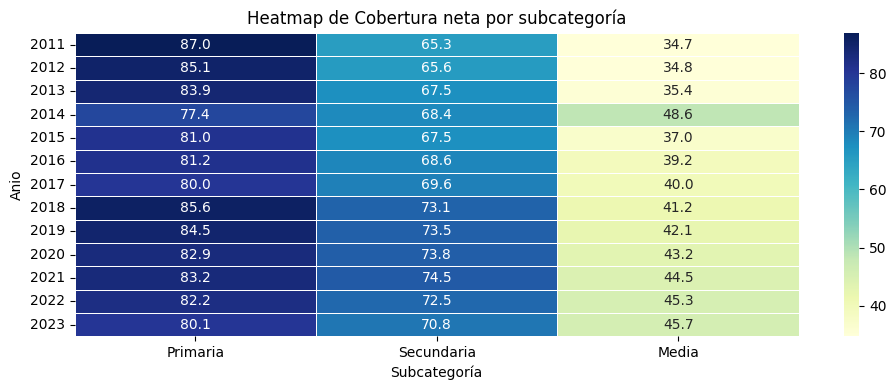

✅ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_cobertura_neta_por_nivel.png


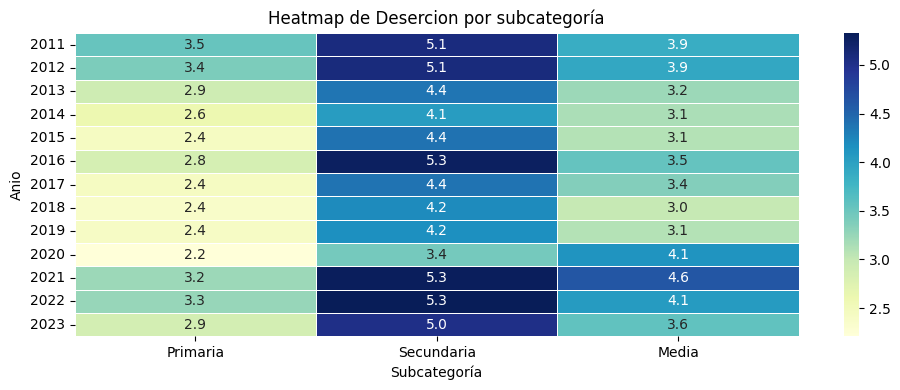

✅ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_desercion_por_nivel.png


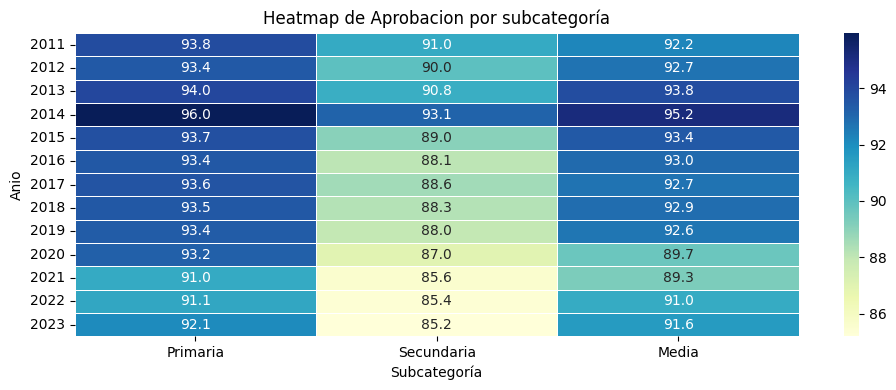

✅ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_aprobacion_por_nivel.png


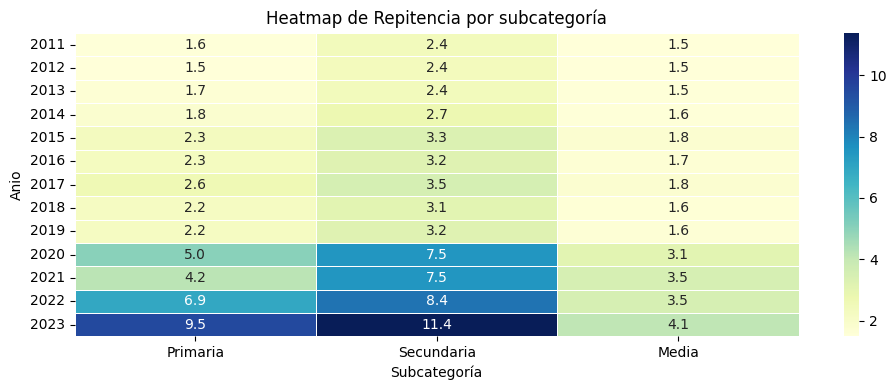

✅ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_repitencia_por_nivel.png


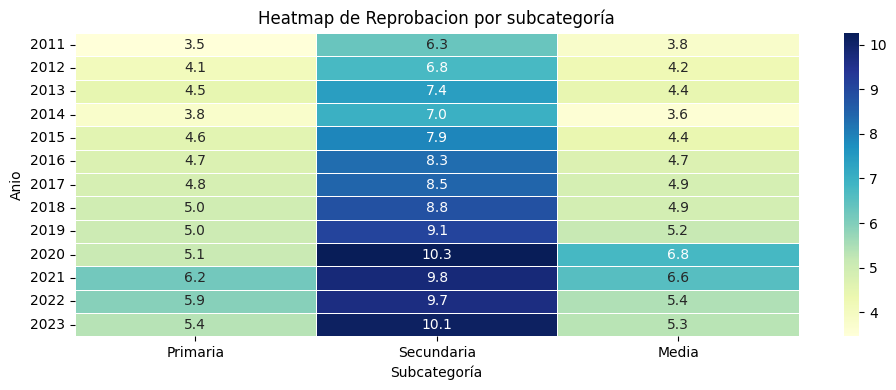

✅ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_reprobacion_por_nivel.png
✅ Generación de heatmaps de subcategorías completada.


In [6]:
df_estadistica= df_cleaned.groupby('anio').mean(numeric_only=True).reset_index()
heatmap_sub_time_series(
        df=df_estadistica,
        subcategories_dict=SUBCATEGORIAS_PLOTLY,
        time_col='anio',
        save_path_prefix=FIGURES_PATH 
    )

Basándonos en las tablas de calor, la interpretación general del sistema educativo entre 2011 y 2023 es la siguiente:

En términos de acceso (cobertura), el sistema ha logrado una penetración muy alta en la educación primaria, mientras que la secundaria y media han mostrado un progreso constante en la ampliación de su cobertura, aunque la media sigue siendo el nivel con menor alcance.

Sin embargo, los indicadores de eficiencia interna y calidad revelan desafíos importantes, especialmente a partir de 2020:
- La deserción escolar es mínima en primaria, pero persiste como un problema considerable en la secundaria y media, lo que indica dificultades para retener a los estudiantes.
- En cuanto al rendimiento académico, la aprobación se mantiene muy alta en primaria. No obstante, la secundaria experimenta un deterioro preocupante en sus tasas de aprobación, mientras que la media, aunque también afectada, muestra cierta resiliencia.
- El aspecto más crítico es el aumento drástico de la repitencia (repitición de año) en todos los niveles educativos a partir de 2020, siendo particularmente alarmante en primaria y secundaria. Esto sugiere que un número creciente de estudiantes no logra avanzar de grado satisfactoriamente.
- La reprobación (pérdida de asignaturas o el año) también es una preocupación constante y creciente en la secundaria, aunque en primaria y media, tras un aumento en 2020, se observa una ligera tendencia a la estabilización o disminución en los años más recientes.

Se interpreta entonces, que el sistema educativo colombiano ha expandido su alcance, pero enfrenta serios retos en la calidad y el progreso estudiantil, especialmente acentuados después de 2020, probablemente debido al impacto de la pandemia. La educación secundaria emerge como el nivel con los mayores problemas de retención y rendimiento, mientras que el aumento de la repitencia a nivel general es un indicador clave de dificultades en el aprendizaje o la progresión de los estudiantes.

### 4.4.4 Boxplot para indicadores


Generando boxplots anuales para 5 indicadores...


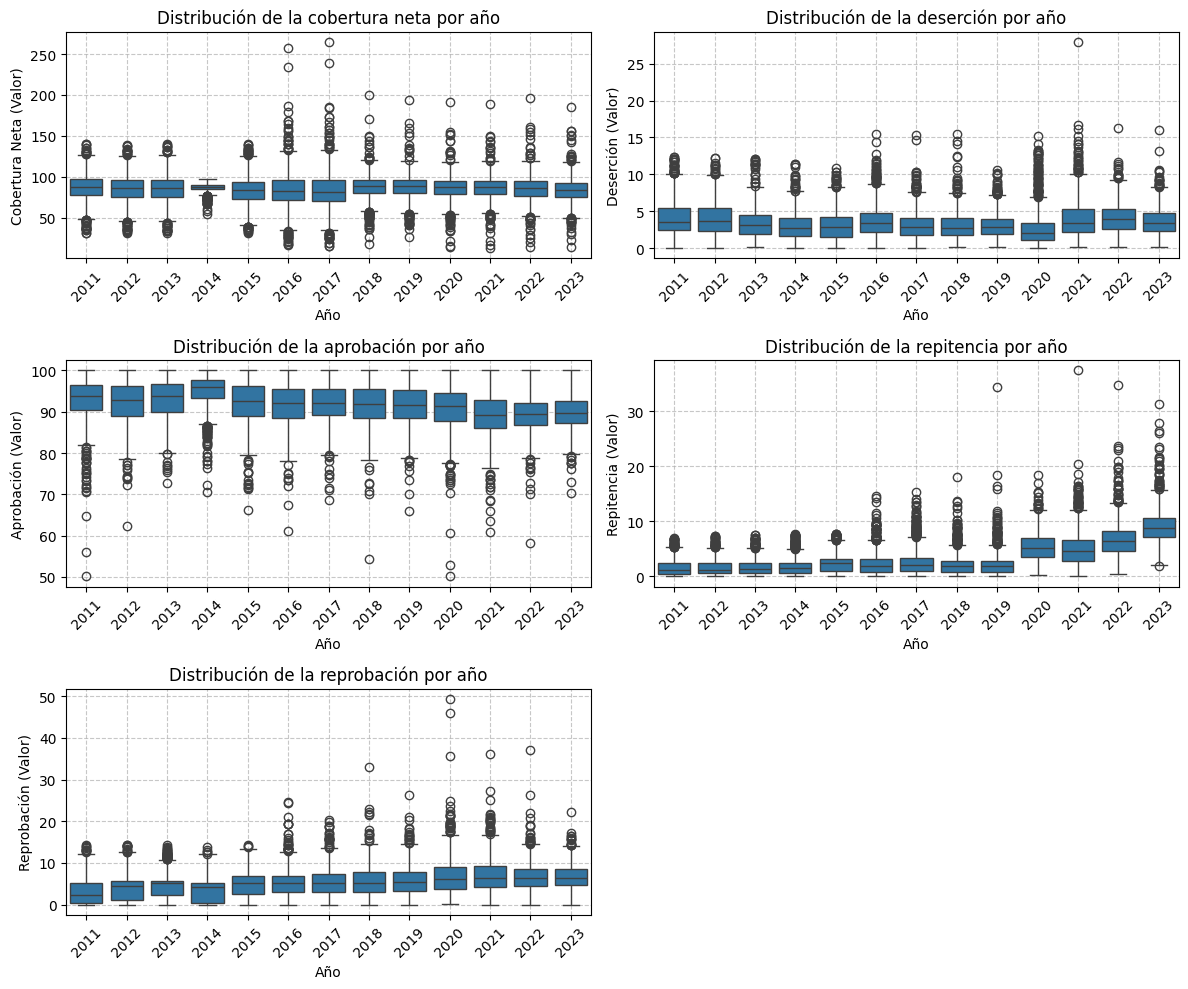

✅ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\boxplots_distribucion_anual.png
✅ Generación de boxplots anuales completada.


In [7]:
plot_yearly_boxplots(
        df=df_cleaned,
        indicators=INDICADORES_BOXPLOTS,
        titles_dict=TITULOS_BOXPLOTS,
        time_col='anio',
        save_filename='boxplots_distribucion_anual.png'
    )

📊 **1. Variabilidad en los indicadores**
- Cobertura neta: Se mantiene relativamente estable en la mediana, pero con cierta dispersión en los extremos. Municipios con menor cobertura pueden estar afectando la distribución.
- Deserción: Disminuye ligeramente con el tiempo, lo cual es una señal positiva. Sin embargo, algunos municipios presentan valores muy elevados.
- Aprobación: Se observa una mediana alta y estable, pero con presencia de valores atípicos en ciertos años que podrían indicar municipios con problemas específicos.

🚨 **2. Identificación de valores extremos**
- Repitencia y reprobación: Tienen variabilidad significativa, con algunos municipios mostrando tasas muy altas en ciertos años. Esto podría indicar zonas con desafíos estructurales en educación, como falta de recursos o problemas en el sistema de evaluación.

🔍 **3. Tendencias en el tiempo**
- La mayoría de los indicadores se mantienen estables, pero los valores extremos sugieren la existencia de municipios que requieren intervenciones educativas específicas.
- La deserción muestra una leve reducción, lo que podría reflejar mejoras en políticas de retención escolar.

### 4.4.5 Matriz correlación Spearman (Mapa de calor)


Calculando y generando heatmap de correlación para 5 indicadores...


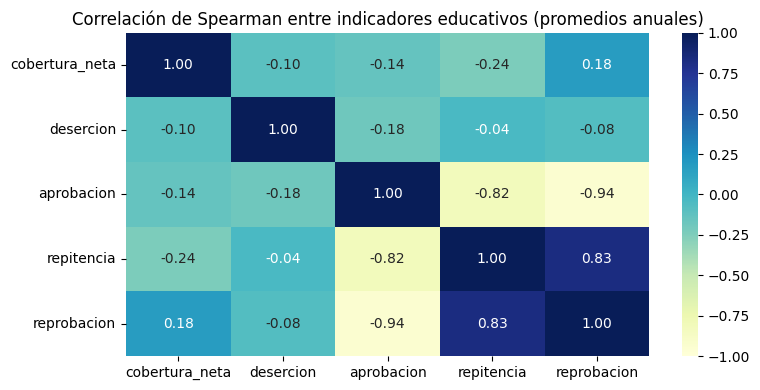

✅ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_correlacion_sperman.png
Generación de heatmap de correlación completada.


In [8]:
plot_heatmap_correlation(
        df=df_cleaned,
        indicators=INDICADORES_BOXPLOTS,
        time_col='anio',
        title='Correlación de Spearman entre indicadores educativos (promedios anuales)',
        save_filename='heatmap_correlacion_sperman.png'
    )

🔍 Relaciones destacadas
1. Aprobación vs. Reprobación y Repitencia
- Existe una correlación negativa fuerte entre aprobación y reprobación (-0.94) y entre aprobación y repitencia (-0.82).
- Esto significa que en los municipios donde la tasa de aprobación es más alta, los niveles de reprobación y repitencia son significativamente más bajos.
- Es un hallazgo esperado: si más estudiantes aprueban, menos necesitan repetir o reprobar.
2. Repitencia y Reprobación están estrechamente relacionadas
- Su correlación positiva alta (0.83) sugiere que los municipios donde hay más estudiantes repitiendo el curso, también tienen más estudiantes reprobando.
- Esto podría indicar deficiencias en el sistema de apoyo para los estudiantes en riesgo.
3. Cobertura vs. Otros Indicadores
- Cobertura neta tiene correlaciones relativamente débiles con los demás indicadores (-0.09 con deserción, -0.09 con aprobación, -0.28 con repitencia y +0.11 con reprobación).
- Esto sugiere que la cobertura educativa no tiene un impacto fuerte en la probabilidad de aprobación, repitencia o deserción.
- Es posible que otros factores como calidad educativa, recursos o condiciones socioeconómicas tengan más peso.
4. Deserción y Aprobación
- La correlación negativa (-0.18) entre deserción y aprobación indica que los municipios con más deserción suelen tener menos estudiantes aprobando.
- Aunque no es una relación fuerte, sugiere que mejorar los niveles de aprobación podría ayudar a reducir la deserción.


### 4.4.6 Distribución densidad entre 2020 y 2023


Generando gráficos de distribución comparativos para 5 indicadores entre 2020 y 2023...


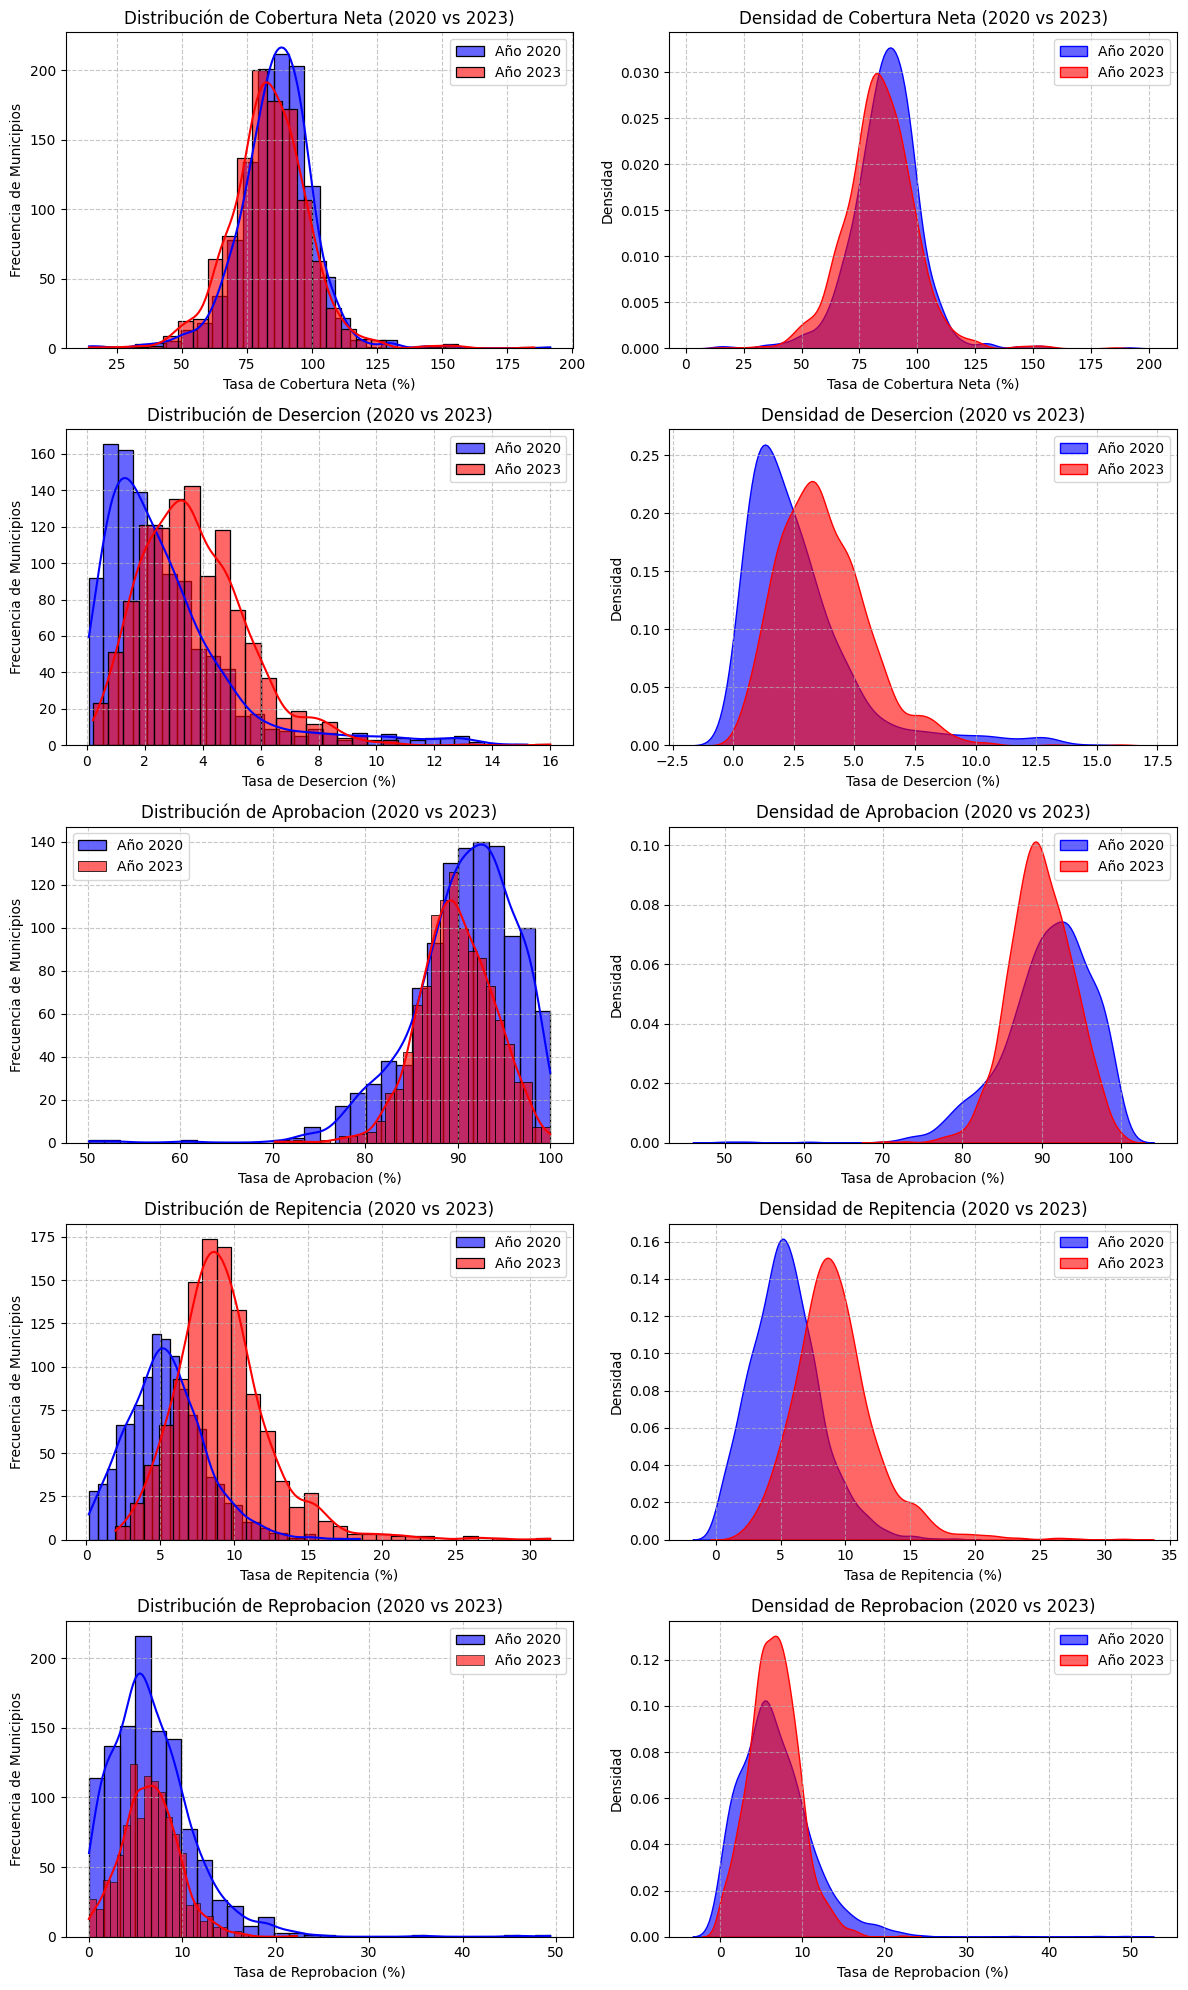

✅ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\distribucion_comparativa_2011_2023.png
✅ Generación de gráficos de distribución comparativos completada.


In [9]:
plot_distribution_comparison_two_years(
        df=df_cleaned, 
        indicators=INDICADORES_BOXPLOTS,
        year_start=2020,
        year_end=2023,
        save_filename='distribucion_comparativa_2011_2023.png'
    )

Las gráficas de distribución y densidad confirman y detallan las tendencias observadas en la línea de tiempo. Muestran que los impactos de la pandemia (que inició en 2020 y se extendió hasta 2023) se manifestaron a nivel municipal principalmente en un aumento generalizado en la repitencia y reprobación, y una ligera disminución en la cobertura neta. La deserción, aunque con un leve aumento, mantuvo una distribución más concentrada en valores bajos. Esto refuerza la idea de que la crisis sanitaria generó brechas en el aprendizaje y la progresión académica.